# Delhi Metro Network Analysis

In [149]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('ggplot')
import folium
import warnings
warnings.filterwarnings('ignore')

In [8]:
metro_data = pd.read_csv(r"C:\Users\areeb\Desktop\Personal Projects\Data Sets\Delhi-Metro-Network.csv")

In [10]:
metro_data.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [11]:
metro_data.shape

(285, 8)

In [12]:
metro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                285 non-null    int64  
 1   Station Name              285 non-null    object 
 2   Distance from Start (km)  285 non-null    float64
 3   Line                      285 non-null    object 
 4   Opening Date              285 non-null    object 
 5   Station Layout            285 non-null    object 
 6   Latitude                  285 non-null    float64
 7   Longitude                 285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [13]:
metro_data.describe()

,Station ID,Distance from Start (km),Latitude,Longitude
count,285.000000,285.000000,285.000000,285.000000
mean,143.000000,19.218947,28.595428,77.029315
std,82.416625,14.002862,0.091316,2.875400
min,1.000000,0.000000,27.920862,28.698807
25%,72.000000,7.300000,28.545828,77.107130
50%,143.000000,17.400000,28.613453,77.207220
75%,214.000000,28.800000,28.666360,77.281165
max,285.000000,52.700000,28.878965,77.554479


In [14]:
# checking for missing values
metro_data.isnull().sum()

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [16]:
metro_data.dtypes

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

In [20]:
# Now, I’ll convert the Opening Date column to a datetime format for ease of analysis: 

metro_data['Opening Date'] = pd.to_datetime(metro_data['Opening Date'])

# Geospatial Analysis

In [31]:
metro_data['Line'].value_counts()

Line
Blue line            49
Pink line            38
Yellow line          37
Voilet line          34
Red line             29
Magenta line         25
Aqua line            21
Green line           21
Rapid Metro          11
Blue line branch      8
Orange line           6
Gray line             3
Green line branch     3
Name: count, dtype: int64

In [32]:
# defining Line colors scheme for the metro lines

In [33]:
line_colors = { 'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'}

In [46]:
delhi_map_with_line_tooltip = folium.Map(location = [28.7041, 77.1025], zoom_start = 11)

In [47]:
# adding colored markers for each metro station with line name in tooltip

for index, row in metro_data.iterrows():
    line = row["Line"]
    color = line_colors.get(line, 'black')   # Default color is black if line not found in the dictionary
    folium.Marker(
        location = [row["Latitude"], row['Longitude']],
        popup = f"{row['Station Name']}",
        tooltip = f"{row['Station Name']}, {line}",
        icon = folium.Icon(color = color)
    ).add_to(delhi_map_with_line_tooltip)

In [48]:
delhi_map_with_line_tooltip

# Temporal Analysis

In [50]:
metro_data['Opening Year'] = metro_data['Opening Date'].dt.year

In [52]:
# counting the number of stations opened each year

metro_data['Opening Year'].value_counts()

Opening Year
2018    64
2010    54
2019    37
2005    28
2017    18
2009    17
2011    13
2015    13
2004    11
2006     9
2002     6
2013     5
2003     4
2008     3
2014     3
Name: count, dtype: int64

In [55]:
stations_per_year = metro_data['Opening Year'].value_counts().sort_index()

In [56]:
stations_per_year

Opening Year
2002     6
2003     4
2004    11
2005    28
2006     9
2008     3
2009    17
2010    54
2011    13
2013     5
2014     3
2015    13
2017    18
2018    64
2019    37
Name: count, dtype: int64

In [59]:
stations_per_year_df = stations_per_year.reset_index()
stations_per_year_df

,Opening Year,count
0,2002,6
1,2003,4
2,2004,11
3,2005,28
4,2006,9
5,2008,3
6,2009,17
7,2010,54
8,2011,13
9,2013,5


In [62]:
stations_per_year_df.columns = ['Year', 'Number of Stations']

In [64]:
stations_per_year_df

,Year,Number of Stations
0,2002,6
1,2003,4
2,2004,11
3,2005,28
4,2006,9
5,2008,3
6,2009,17
7,2010,54
8,2011,13
9,2013,5


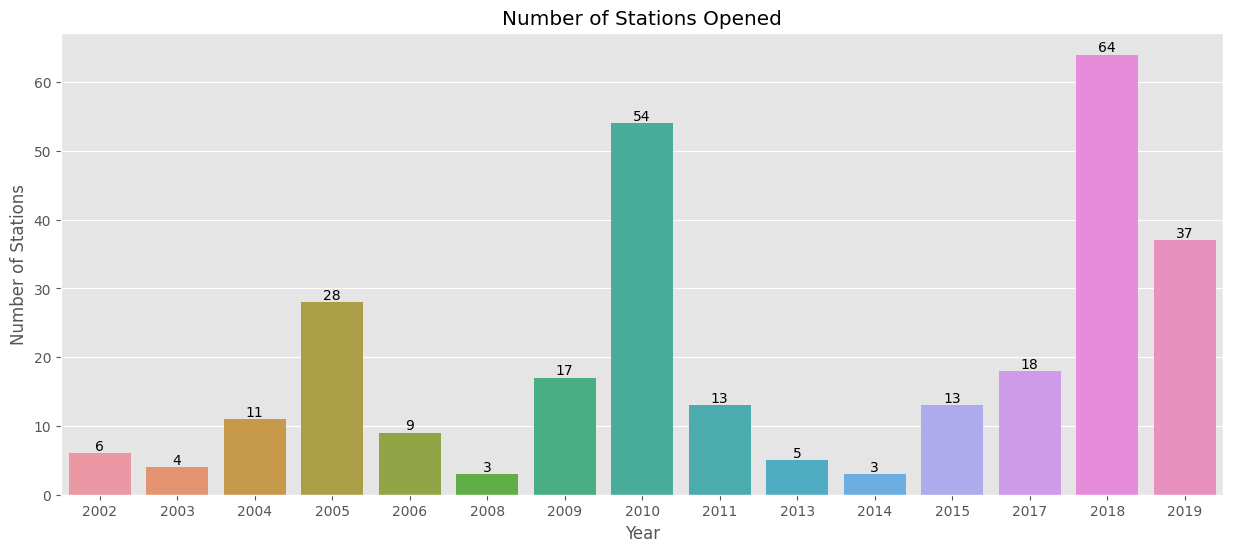

In [78]:
plt.figure( figsize = (15,6))
ax = sns.barplot( stations_per_year_df , x = 'Year', y = 'Number of Stations')
plt.title('Number of Stations Opened')

for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [82]:
stations_per_line = metro_data['Line'].value_counts()
stations_per_line

Line
Blue line            49
Pink line            38
Yellow line          37
Voilet line          34
Red line             29
Magenta line         25
Aqua line            21
Green line           21
Rapid Metro          11
Blue line branch      8
Orange line           6
Gray line             3
Green line branch     3
Name: count, dtype: int64

In [85]:
# calculating the total distance of each metro line (max distance from start)

total_distance_per_line = metro_data.groupby('Line').max()['Distance from Start (km)']
total_distance_per_line

Line
Aqua line            27.1
Blue line            52.7
Blue line branch      8.1
Gray line             3.9
Green line           24.8
Green line branch     2.1
Magenta line         33.1
Orange line          20.8
Pink line            52.6
Rapid Metro          10.0
Red line             32.7
Voilet line          43.5
Yellow line          45.7
Name: Distance from Start (km), dtype: float64

In [89]:
avg_distance_per_line = total_distance_per_line / (stations_per_line-1)
avg_distance_per_line

Line
Aqua line            1.355000
Blue line            1.097917
Blue line branch     1.157143
Gray line            1.950000
Green line           1.240000
Green line branch    1.050000
Magenta line         1.379167
Orange line          4.160000
Pink line            1.421622
Rapid Metro          1.000000
Red line             1.167857
Voilet line          1.318182
Yellow line          1.269444
dtype: float64

In [91]:
line_analysis = pd.DataFrame({'line': stations_per_line.index,
                             'Number of Stations': stations_per_line.values,
                              'Avg Distance Between Station (km)': avg_distance_per_line})

In [92]:
line_analysis

,line,Number of Stations,Avg Distance Between Station (km)
Line,,,
Aqua line,Blue line,49,1.355000
Blue line,Pink line,38,1.097917
Blue line branch,Yellow line,37,1.157143
Gray line,Voilet line,34,1.950000
Green line,Red line,29,1.240000
Green line branch,Magenta line,25,1.050000
Magenta line,Aqua line,21,1.379167
Orange line,Green line,21,4.160000
Pink line,Rapid Metro,11,1.421622


In [96]:
# sorting the DataFrame by the number of stations
line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)
line_analysis

,line,Number of Stations,Avg Distance Between Station (km)
Line,,,
Aqua line,Blue line,49,1.355000
Blue line,Pink line,38,1.097917
Blue line branch,Yellow line,37,1.157143
Gray line,Voilet line,34,1.950000
Green line,Red line,29,1.240000
Green line branch,Magenta line,25,1.050000
Magenta line,Aqua line,21,1.379167
Orange line,Green line,21,4.160000
Pink line,Rapid Metro,11,1.421622


In [99]:
line_analysis.reset_index(drop=True, inplace=True)
line_analysis

,line,Number of Stations,Avg Distance Between Station (km)
0,Blue line,49,1.355000
1,Pink line,38,1.097917
2,Yellow line,37,1.157143
3,Voilet line,34,1.950000
4,Red line,29,1.240000
5,Magenta line,25,1.050000
6,Aqua line,21,1.379167
7,Green line,21,4.160000
8,Rapid Metro,11,1.421622
9,Blue line branch,8,1.000000


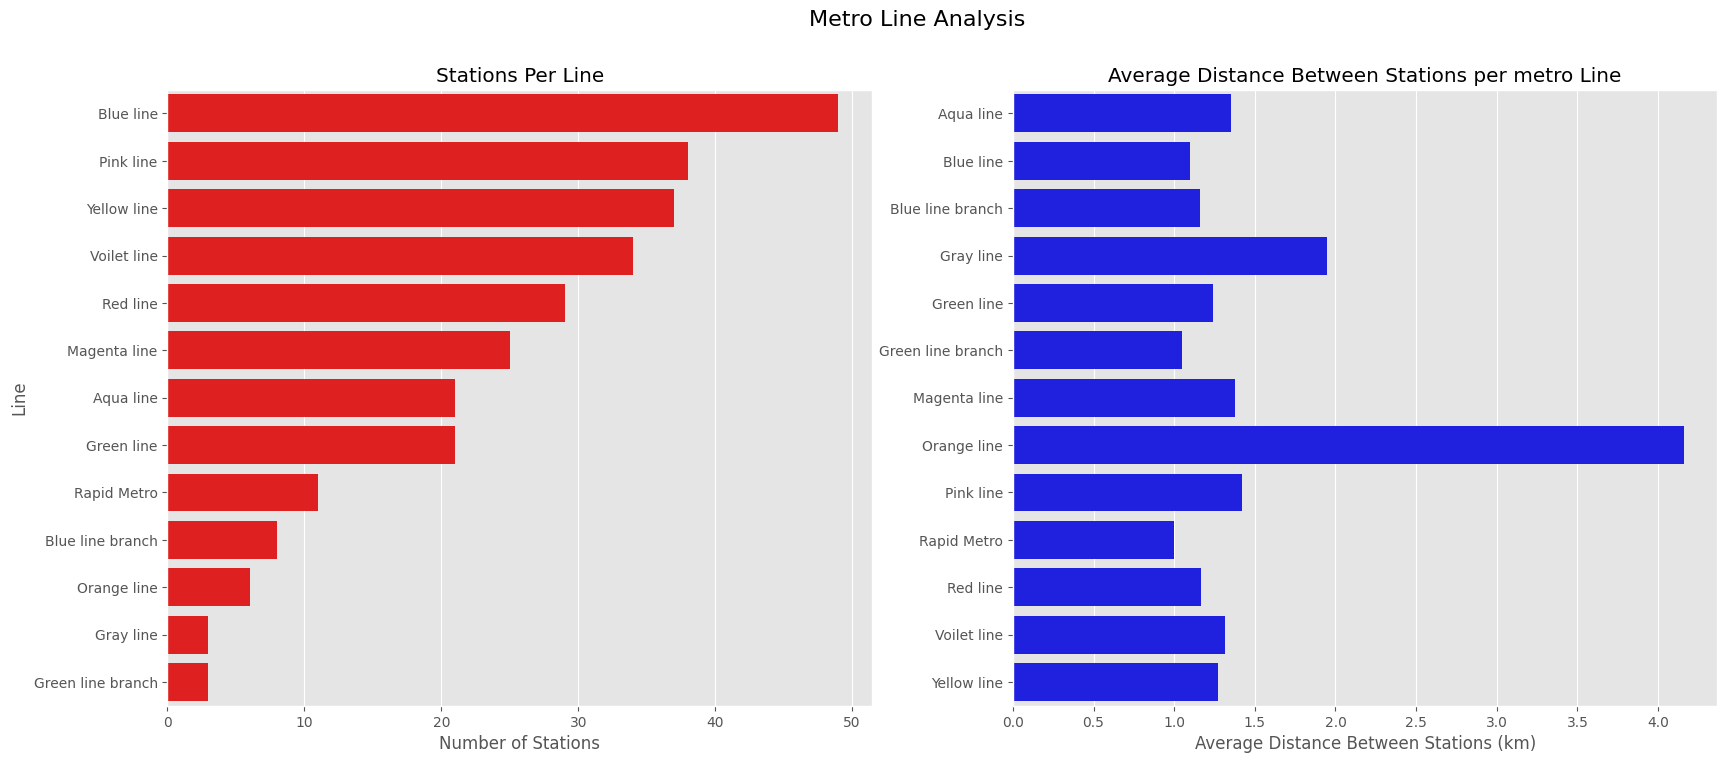

In [129]:
plt.figure( figsize= (20,8))

plt.subplot(1,2,1)
sns.barplot(y = stations_per_line.index , x = stations_per_line.values , color = 'Red')
plt.title( 'Stations Per Line')
plt.xlabel('Number of Stations')

plt.subplot(1,2,2)
sns.barplot(y = avg_distance_per_line.index , x = avg_distance_per_line.values, color = "Blue" )
plt.title("Average Distance Between Stations per metro Line")
plt.xlabel("Average Distance Between Stations (km)")
plt.ylabel('')

plt.suptitle('Metro Line Analysis', fontsize=16)

plt.show()

# Station Layout Analysis

In [132]:
layout_counts = metro_data['Station Layout'].value_counts()
layout_counts

Station Layout
Elevated       214
Underground     68
At-Grade         3
Name: count, dtype: int64

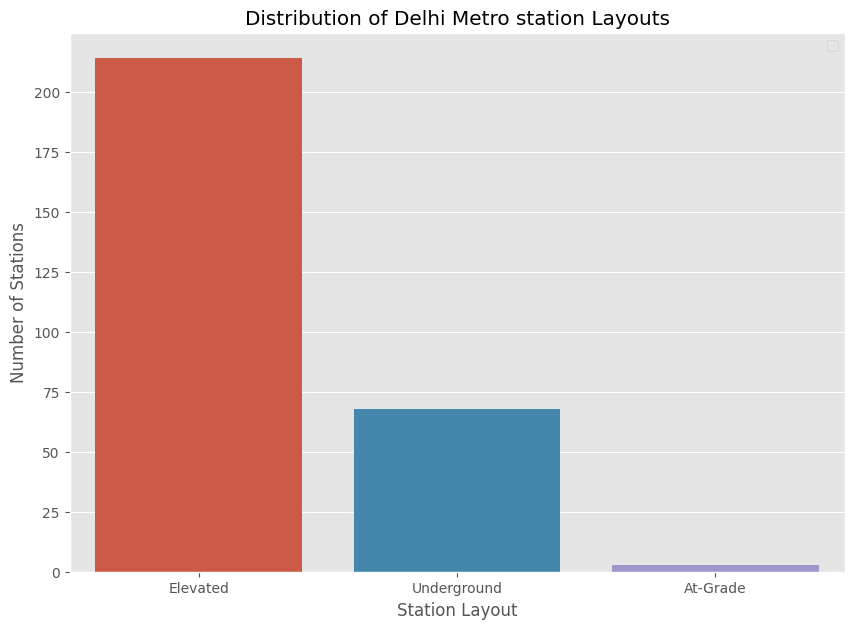

In [148]:
plt.figure( figsize = (10,7))
sns.barplot(x = layout_counts.index , y = layout_counts.values)
plt.title('Distribution of Delhi Metro station Layouts')
plt.ylabel("Number of Stations")
plt.legend()
plt.show()

# Observations

# Summary

Metro Network Analysis involves examining the network of metro systems to understand their structure, efficiency, and effectiveness. It typically includes analyzing routes, stations, traffic, connectivity, and other operational aspects.